In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('titanic_clean_updated2.pkl')
# df = pd.read_csv('titanic_train.csv')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,male,22.00000,1,0,7.2500,S,1,False
1,1,1,Mrs.,female,38.00000,1,0,71.2833,C,1,False
2,1,3,Miss.,female,26.00000,0,0,7.9250,S,0,True
3,1,1,Mrs.,female,35.00000,1,0,53.1000,S,1,False
4,0,3,Mr.,male,35.00000,0,0,8.0500,S,0,True
5,0,3,Mr.,male,25.14062,0,0,8.4583,Q,0,True
6,0,1,Mr.,male,54.00000,0,0,51.8625,S,0,True
7,0,3,Master.,male,2.00000,3,1,21.0750,S,4,False
8,1,3,Mrs.,female,27.00000,0,2,11.1333,S,2,False
9,1,2,Mrs.,female,14.00000,1,0,30.0708,C,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Name        891 non-null    object  
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    category
 9   Group_size  891 non-null    int64   
 10  Alone       891 non-null    bool    
dtypes: bool(1), category(4), float64(2), int64(3), object(1)
memory usage: 46.3+ KB


In [4]:
df.isna().sum()  # no more any missing values in any of the features!!

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Group_size    0
Alone         0
dtype: int64

In [5]:
df['Group_size'] = df['Group_size'] + 1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,male,22.0,1,0,7.2500,S,2,False
1,1,1,Mrs.,female,38.0,1,0,71.2833,C,2,False
2,1,3,Miss.,female,26.0,0,0,7.9250,S,1,True
3,1,1,Mrs.,female,35.0,1,0,53.1000,S,2,False
4,0,3,Mr.,male,35.0,0,0,8.0500,S,1,True


In [8]:
df['Name'] = df['Name'].astype('category')

In [11]:
df['Alone'] = df['Alone'].astype('int')

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,male,22.0,1,0,7.2500,S,2,0
1,1,1,Mrs.,female,38.0,1,0,71.2833,C,2,0
2,1,3,Miss.,female,26.0,0,0,7.9250,S,1,1
3,1,1,Mrs.,female,35.0,1,0,53.1000,S,2,0
4,0,3,Mr.,male,35.0,0,0,8.0500,S,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Name        891 non-null    category
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    category
 9   Group_size  891 non-null    int64   
 10  Alone       891 non-null    int32   
dtypes: category(5), float64(2), int32(1), int64(3)
memory usage: 43.0 KB


## Converting the Categorical Col into numeric: Label Encoding

In [ ]:
# *** LAbel Encoding >>> Ordinal variables
# One Hot Encoding  >>>> Nominal variable

# You can do Label encoding for a Nominal var, IFF it has exactly 2 cat values (e.g. Sex in this case)

In [14]:
df['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [15]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
LE_sex.fit(df['Sex'])
LE_sex.classes_  # LE has "learnt" that there 2 qunique values in the categorical col.

array(['female', 'male'], dtype=object)

In [16]:
df['Sex'] = LE_sex.transform(df['Sex'])

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,1,22.0,1,0,7.2500,S,2,0
1,1,1,Mrs.,0,38.0,1,0,71.2833,C,2,0
2,1,3,Miss.,0,26.0,0,0,7.9250,S,1,1
3,1,1,Mrs.,0,35.0,1,0,53.1000,S,2,0
4,0,3,Mr.,1,35.0,0,0,8.0500,S,1,1


In [18]:
df[['Embarked']].head(10)

,Embarked
0,S
1,C
2,S
3,S
4,S
5,Q
6,S
7,S
8,S
9,C


## OneHot Encoding

In [19]:
emb = pd.get_dummies(df['Embarked'], prefix_sep='_', prefix='Emb')
emb.head(10)

,Emb_C,Emb_Q,Emb_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,1,22.0,1,0,7.2500,S,2,0
1,1,1,Mrs.,0,38.0,1,0,71.2833,C,2,0
2,1,3,Miss.,0,26.0,0,0,7.9250,S,1,1
3,1,1,Mrs.,0,35.0,1,0,53.1000,S,2,0
4,0,3,Mr.,1,35.0,0,0,8.0500,S,1,1


In [21]:
df = pd.concat([df, emb], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone,Emb_C,Emb_Q,Emb_S
0,0,3,Mr.,1,22.0,1,0,7.2500,S,2,0,0,0,1
1,1,1,Mrs.,0,38.0,1,0,71.2833,C,2,0,1,0,0
2,1,3,Miss.,0,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,Mrs.,0,35.0,1,0,53.1000,S,2,0,0,0,1
4,0,3,Mr.,1,35.0,0,0,8.0500,S,1,1,0,0,1


In [22]:
df.drop('Embarked', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S
0,0,3,Mr.,1,22.0,1,0,7.2500,2,0,0,0,1
1,1,1,Mrs.,0,38.0,1,0,71.2833,2,0,1,0,0
2,1,3,Miss.,0,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,Mrs.,0,35.0,1,0,53.1000,2,0,0,0,1
4,0,3,Mr.,1,35.0,0,0,8.0500,1,1,0,0,1


In [24]:
titles = pd.get_dummies(df['Name'], prefix_sep='_', prefix='Titles')
titles.head()

,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [25]:
df = pd.concat([df, titles], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others
0,0,3,Mr.,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0
1,1,1,Mrs.,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0
2,1,3,Miss.,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0
3,1,1,Mrs.,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0
4,0,3,Mr.,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0


In [26]:
df.drop('Name', axis=1, inplace=True)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others
0,0,3,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0


In [31]:
# converting the Pclass feature into OHE 
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,0,1


### Your Entire data contains numbers

In [32]:
df.to_csv('titanic_clean_final.csv', index=False)

In [33]:
df.to_pickle('titanic_clean_final.pkl')

In [34]:
# df = pd.read_pickle('titanic_clean.pkl')
# df.head()

In [35]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,0,1


## Remove Outliers !

In [70]:
# There are 2 MOST COMMON criterion for identifying the outliers:
#     1) based out of IQR
#     2) based out of std_dev:
#         - any value which is less than mean - 2*std_dev is an outlier on the lower side
#         - any value which is higher than mean + 2*std_dev is an outlier on the higher side

In [55]:
lb = 22 - 1.5*(37-22)
ub = 37 + 1.5*(37-22)
lb, ub


(-0.5, 59.5)

In [57]:
### remove outliers for Age col 
def remove_outliers(age):
    if age<lb:
        return lb
    elif age>ub:
        return ub
    else: return age

In [58]:
df['Age'] = df['Age'].apply(remove_outliers)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3,Alone
0,0,1,22.0,1,0,7.2500,0,1,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1,1
3,1,0,35.0,1,0,53.1000,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,0,1,0,1,1


In [59]:
df.Age.min(), df.Age.max()

(0.42, 59.5)

(0.42, 59.5)

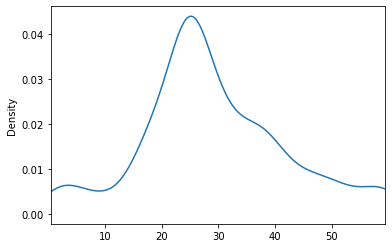

In [60]:
df['Age'].plot.kde()
plt.xlim([df.Age.min(), df.Age.max()])

(0.0, 512.3292)

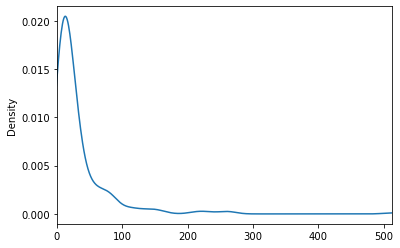

In [61]:
df['Fare'].plot.kde()
plt.xlim([df.Fare.min(), df.Fare.max()])

In [62]:
def remove_outliers(df1):
    IQR = df1.quantile(0.75) - df1.quantile(0.25)
    ub = df1.quantile(0.75) + 1.5*IQR    # this eq. to 2.7 std_dev away from the mean
    lb = df1.quantile(0.25) - 1.5*IQR
    
    new_vals = []
    for val in df1.values:
        if val<lb:
            new_vals.append(lb)
        elif val>ub:
            new_vals.append(ub)
        else: new_vals.append(val)
    
    return new_vals

In [63]:
df['Fare'] = remove_outliers(df['Fare'])

In [64]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Pclass_2,Pclass_3,Alone
0,0,1,22.0,1,0,7.2500,0,1,0,1,0
1,1,0,38.0,1,0,65.6344,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1,1
3,1,0,35.0,1,0,53.1000,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,0,1,0,1,1


(0.0, 65.6344)

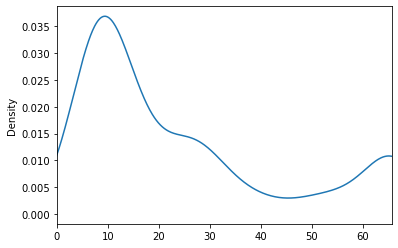

In [65]:
df['Fare'].plot.kde()
plt.xlim([df.Fare.min(), df.Fare.max()])

In [66]:
df.to_pickle('titanic_clean1.pkl')

### Modelling Steps

In [126]:
# HW : Try doing OHE of the SibSp, Parch, or try binning of the Age Col [0, 18, 25, 35, 60, 100]
#  sklearn KbinDiscretizer, or else pandas.cut()
#     Add another col called as "Alone" (binary col)... values 0 or 1
    

In [36]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,0,1


In [37]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X.shape, y.shape

((891, 17), (891,))

## Model Building

In [69]:
# Split your data into training and validatino sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((623, 10), (268, 10))

In [73]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression finds the prob. of a datapoint to belong to a default class (Y=1, hard-coded)
# these prob. (0 to 1) are calculated using the sigmoid/logistic fun.. 
# P(Y=1 | Xi) = 1 / [1 + exp(-z)]
# where z = w0 + w1X1 + w2X2 + ..... w10*X10 >>>> these wj.. are model coeffiencts (Logistic REg is a statistical model)

# Loss function for logisticReg is Binary Cross Entropy (neg log loss) + penalty_term
# penalty_term = penalty_param*(L1 or L2 norm of the weights)
# C is inverse of lambda (too_low C will lead to underfitting/overgeneralization, 
# very_high val of C  lead to overfitting)

# We are intending to minimise the Loss_fn = (BCE_loss + Reg_term)
# Hence it is an optimization problem...
# Optimizer is the algo which finds the minima of a given loss_fn/cost_fn

# and the optimizer for LogisticREg is lbfgs (default) ???


LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)   # training should be done on the training set.

LogisticRegression(solver='liblinear')

In [74]:
LR.intercept_

array([2.25190532])

In [75]:
LR.coef_

array([[-2.33619019, -0.02722802, -0.46317303, -0.23317353,  0.02646249,
         0.01424865, -0.44976676,  0.3099896 , -0.76138305, -0.39687217]])

In [76]:
list(X.columns)

['Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Emb_Q',
 'Emb_S',
 'Pclass_2',
 'Pclass_3',
 'Alone']

In [77]:
coef_df = pd.DataFrame(np.array(LR.coef_).reshape(-1,1), index=X.columns, columns=['LR_Coef'])
coef_df

,LR_Coef
Sex,-2.336190
Age,-0.027228
SibSp,-0.463173
Parch,-0.233174
Fare,0.026462
Emb_Q,0.014249
Emb_S,-0.449767
Pclass_2,0.309990
Pclass_3,-0.761383
Alone,-0.396872


In [86]:
X_test.shape

(268, 10)

In [87]:
# fetch the accuracy of the model
LR.score(X_test, y_test)  # validating our model's performance on the TEST SET.

0.8022388059701493

In [88]:
y_pred = LR.predict(X_test)  # predicted classs labels
y_pred[:20]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [89]:
res = pd.DataFrame(y_test)
res['Predicted'] = y_pred
res.head(10)

,Survived,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [90]:
# Fetch the prob.... ?
prob_values = LR.predict_proba(X_test)
prob_values

array([[0.86093792, 0.13906208],
       [0.76623035, 0.23376965],
       [0.88361852, 0.11638148],
       [0.06985956, 0.93014044],
       [0.2801656 , 0.7198344 ],
       [0.08060261, 0.91939739],
       [0.34786122, 0.65213878],
       [0.89853978, 0.10146022],
       [0.29373039, 0.70626961],
       [0.18034961, 0.81965039],
       [0.64554264, 0.35445736],
       [0.9356748 , 0.0643252 ],
       [0.64395096, 0.35604904],
       [0.86624861, 0.13375139],
       [0.77853174, 0.22146826],
       [0.1019321 , 0.8980679 ],
       [0.67919755, 0.32080245],
       [0.34738592, 0.65261408],
       [0.73342668, 0.26657332],
       [0.69732485, 0.30267515],
       [0.8944323 , 0.1055677 ],
       [0.76025852, 0.23974148],
       [0.43337561, 0.56662439],
       [0.88003385, 0.11996615],
       [0.88007388, 0.11992612],
       [0.9361523 , 0.0638477 ],
       [0.6977732 , 0.3022268 ],
       [0.75417238, 0.24582762],
       [0.92566355, 0.07433645],
       [0.49808589, 0.50191411],
       [0.

In [91]:
prob_1 = prob_values[:,1]  # extracting thr prob. against Class Y=1
prob_1[:10]

array([0.13906208, 0.23376965, 0.11638148, 0.93014044, 0.7198344 ,
       0.91939739, 0.65213878, 0.10146022, 0.70626961, 0.81965039])

In [92]:
thresh = 0.8
new_predictions = []
for prob in prob_1:
    if prob > thresh:
        new_predictions.append(1)
    else: new_predictions.append(0)
        
new_predictions  # these are the new class predictinos based on the changed theshold !!!!

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [94]:
confusion_matrix(y_test, y_pred)  # CM with the def threshold of 0.5

array([[136,  21],
       [ 32,  79]], dtype=int64)

In [95]:
confusion_matrix(y_test, new_predictions)  # CM with the threshold of 0.8

array([[155,   2],
       [ 68,  43]], dtype=int64)

In [96]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       157
           1       0.96      0.39      0.55       111

    accuracy                           0.74       268
   macro avg       0.83      0.69      0.68       268
weighted avg       0.80      0.74      0.71       268



In [97]:
# overall accuracy =
(155+43)/268

0.7388059701492538

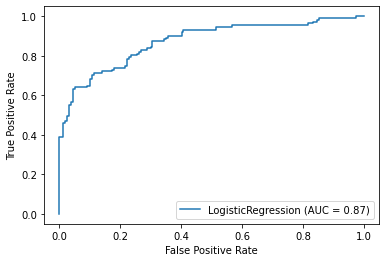

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR, X_test, y_test) 

In [72]:
confusion_matrix(y_test, new_predictions)   # CM with the threshold of 0.8

array([[155,  68],
       [  2,  43]], dtype=int64)

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA.score(X_test, y_test)

0.8059701492537313

### STOP !

In [147]:
### Let's try out a few more models
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [148]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

models # we have created a list of models which will be tried!!

[('LR', LogisticRegression(solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [149]:
scores = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    names.append(name)
    scores.append(model.score(X_test, y_test) )

In [150]:
names, scores

(['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM'],
 [0.8022388059701493,
  0.8059701492537313,
  0.7126865671641791,
  0.7723880597014925,
  0.7761194029850746,
  0.6791044776119403])

In [151]:
X.shape, y.shape

((891, 10), (891,))

In [152]:
#%% evaluate each model in turn
from sklearn.model_selection import StratifiedKFold, cross_val_score
results = []
names = []
n_splits = 5
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

LR: 72.08 ( 4.45)
LDA: 72.31 ( 5.02)
KNN: 58.13 ( 5.96)
CART: 71.72 ( 3.87)
NB: 70.55 ( 2.23)
SVM: 48.54 ( 7.52)


In [153]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LDA,0.651852,0.736842,0.677966,0.772727,0.776119,0.723101,0.056072
LR,0.651852,0.751880,0.683761,0.757576,0.759124,0.720838,0.049782
CART,0.757143,0.718310,0.687500,0.661654,0.761194,0.717160,0.043300
NB,0.697987,0.716216,0.666667,0.714286,0.732394,0.705510,0.024899
KNN,0.613139,0.676259,0.578125,0.527132,0.512000,0.581331,0.066666
SVM,0.632479,0.432990,0.462963,0.468468,0.429907,0.485361,0.084037


In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((623, 10), (268, 10))

In [155]:
scores = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    names.append(name)
    score = model.score(X_test, y_test)
    scores.append(score)
    print(name,':', score)

LR : 0.8208955223880597
LDA : 0.8059701492537313
KNN : 0.7835820895522388
CART : 0.753731343283582
NB : 0.7761194029850746
SVM : 0.8171641791044776


In [156]:
Approaches:
    (A) Standardise the whole data, then do TTS ... then Model_building >> fUNDAMENTALLY WRONG!!!
    (B) DO TTS, then standardardise ... then Model_building  >>> LEADS TO "DATA LEAKAGE" IF YOU DO FIT_TRANSFORM ON THE TEST SET
    (C) USE PIPELINES!!!!

SyntaxError: invalid syntax (<ipython-input-156-a54d4cbbc7f2>, line 1)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((623, 10), (268, 10))

In [158]:
X_train_std = sc.fit_transform(X_train)  # standardizsed training data
X_test_std = sc.transform(X_test)  # standardizsed test data
########  VVVV IMP NOTE: NEVER EVER DO FIT_TRANSORM ON THE TEST/VAL SET.

In [159]:
# HOW DO I RETRAIN MY MODEL ON THE STNADARDISED DATA ????
scores = []
names = []
for name, model in models:
    model.fit(X_train_std, y_train)
    names.append(name)
    score = model.score(X_test_std, y_test)
    scores.append(score)
    print(name,':', score)

LR : 0.8208955223880597
LDA : 0.8059701492537313
KNN : 0.7835820895522388
CART : 0.7574626865671642
NB : 0.7761194029850746
SVM : 0.8171641791044776


In [161]:
# APPROACH B:  LEADS TO DATA-LEAKAGE!!
# How do I crossvalidate my models AFTER standardization ????
scoring = 'f1' #'accuracy'
results = []
names = []
n_splits = 5

for name, model in models:
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print(sorted(cv_results, reverse=True))

LR: 0.705826 (0.051994)
LDA: 0.694584 (0.072197)
KNN: 0.727981 (0.043151)
CART: 0.698788 (0.039199)
NB: 0.655363 (0.051160)
SVM: 0.699641 (0.068379)


In [162]:
#%% Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledSVM,77.6,80.8,78.4,86.290323,83.870968,81.392258,3.668127
ScaledKNN,84.8,79.2,78.4,81.451613,81.451613,81.060645,2.491461
ScaledLR,85.6,79.2,78.4,76.612903,77.419355,79.446452,3.576314
ScaledLDA,86.4,80.8,75.2,76.612903,74.193548,78.641290,5.014899
ScaledCART,77.6,76.0,74.4,80.645161,76.612903,77.051613,2.320761
ScaledNB,75.2,68.8,71.2,77.419355,77.419355,74.007742,3.863408


In [110]:
scoring = 'f1' #'neg_mean_squared_error'
results = []
names = []
n_splits = 5

for name, model in pipelines:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100    

ScaledLR: 0.724458 (0.065673)
ScaledLDA: 0.726309 (0.065575)
ScaledKNN: 0.721917 (0.043758)
ScaledCART: 0.720914 (0.045510)
ScaledNB: 0.710581 (0.036306)
ScaledSVM: 0.706818 (0.070415)


,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLDA,77.165354,72.881356,80.000000,72.307692,60.800000,72.630881,7.331478
ScaledLR,77.165354,72.268908,79.194631,73.282443,60.317460,72.445759,7.342493
ScaledKNN,73.846154,73.949580,74.482759,75.187970,63.492063,72.191705,4.892280
ScaledCART,79.687500,69.421488,70.198675,74.482759,66.666667,72.091418,5.088170
ScaledNB,75.177305,69.767442,73.417722,72.222222,64.705882,71.058115,4.059166
ScaledSVM,73.043478,67.326733,82.608696,69.026549,61.403509,70.681793,7.872601


In [109]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledKNN,77.647059,72.164948,65.217391,77.333333,70.731707,72.618888,5.149227
ScaledLDA,77.272727,77.419355,64.000000,71.794872,68.292683,71.755927,5.802144
ScaledLR,76.404494,76.086957,65.979381,72.000000,68.292683,71.752703,4.631119
ScaledNB,77.777778,72.897196,68.518519,70.454545,64.516129,70.832833,4.947064
ScaledSVM,75.324675,77.647059,59.523810,66.666667,72.222222,70.276887,7.284338
ScaledCART,73.563218,67.346939,57.142857,74.725275,62.068966,66.969451,7.489155


In [ ]:
# HP Tuning of SVM
c_values = [0.1, 0.5, 1.0, 2.0]
kernel_values = ['linear', 'poly', 'rbf']
degree_values = [2,3]
gamma_values =[0.1, 1, 2]
param_grid = dict(C=c_values, kernel=kernel_values, degree=degree_values, \
                 gamma = gamma_values)
model = SVC()

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, \
                    scoring='f1', cv=kfold, )
grid_result = grid.fit(X_train_std, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100